#### steps will do with spacy
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
df.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [2]:
len(df)

31962

In [3]:
df.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [4]:
#Data cleaning and preprocessing
import re
import nltk


from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['tweet'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [5]:
len(corpus)

31962

In [6]:
pd.unique(corpus)

array(['user father dysfunct selfish drag kid dysfunct run',
       'user user thank lyft credit use caus offer wheelchair van pdx disapoint getthank',
       'bihday majesti', ...,
       'see nina turner airwav tri wrap mantl genuin hero like shirley chisolm shame imwithh',
       'listen sad song monday morn otw work sad', 'thank user follow'],
      dtype=object)

In [7]:
type(corpus)

list

In [8]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
x = cv.fit_transform(corpus).toarray()
y = df['label']

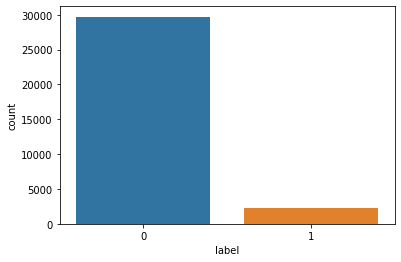

In [10]:
import seaborn as sns

sns.countplot('label', data = df)

In [11]:
positive = df[df['label'] == 1]
negitive = df[df['label'] == 0 ]
print(positive.shape, negitive.shape)

(2242, 3) (29720, 3)


### Undersampling

In [12]:
from imblearn.under_sampling import NearMiss
# Implementing Undersampling for Handling Imbalanced 
nm = NearMiss(random_state=42)
X_res,y_res=nm.fit_sample(x,y)

In [13]:
X_res.shape,y_res.shape


((4484, 2500), (4484,))

In [14]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 29720, 1: 2242})
Resampled dataset shape Counter({0: 2242, 1: 2242})


In [15]:

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_res, y_res)

y_pred=spam_detect_model.predict(X_res)



In [16]:
spam_detect_model.score(X_res, y_res)

0.8956289027653881

### OverSampling

In [ ]:
from imblearn.combine import SMOTETomek
smot = SMOTETomek(random_state = 42)
x_res,y_res = smot.fit_sample(x,y)

In [ ]:
x_res.shape,y_res.shape

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Rshampled daraset shape{}'.format(Counter(y_res)))


In [ ]:
# over sampling other technics
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(ratio = 0.5)
x_res,y_res = ros.fit_sample(x,y)

In [ ]:
print(x_res.shape,y_res.shape)

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Rshampled daraset shape{}'.format(Counter(y_res)))